In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import missingno as msno

In [5]:
import re

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
## Performance metric
## Root mean squared error
## Area under the curve can also be used based on thresholds 

In [ ]:
## data reference - https://www.kaggle.com/gauravduttakiit/loan-defaulter

In [9]:
app_loc = os.path.join('data','loan_defaulter', 'application_data.csv')
prev_app_loc = os.path.join('data', 'loan_defaulter', 'previous_application.csv')

In [10]:
app_df = pd.read_csv(app_loc)

In [234]:
prev_app_df = pd.read_csv(prev_app_loc)

In [11]:
pd.set_option('display.max_columns', 300)

In [12]:
pd.set_option('display.max_rows', 200)

In [13]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
app_df.head(30)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
app_df.loc[:,'TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [16]:
## Identifying which columns are categorical and which are numerical
col_unique = app_df.apply(lambda col: col.nunique())

In [17]:
## Based on the 1st analysis of all the columns any column greater than 23 unique values can be 
## numerical
## CNT_CHILDREN - 15 (Numerical)
## CNT_FAM_MEMBERS - 17 (Numerical)
## OCCUPATION TYPE - 18 (Categorical)
## ORGANIZATION_TYPE - 58 (Categorical)
## DEF_30_CNT_SOCIAL_CIRCLE  - 10 (Numerical)
## DEF_60_CNT_SOCIAL_CIRCLE - 9 (Numerical)
## AMT_REQ_CREDIT_BUREAU_MON - 24 (Numerical)
## AMT_REQ_CREDIT_BUREAU_QRT - 11 (Numerical)
## AMT_REQ_CREDIT_BUREAU_YEAR - 25 (Numerical)
## HOUR_APPR_PROCESS_START - 24 (can be both numerical or categorical), presently we are considering it numerical

In [18]:
## Seperating numerical columns from categorical columns
num_col = (list(col_unique.loc[col_unique > 23].index) + ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DEF_30_CNT_SOCIAL_CIRCLE',
                                                          'DEF_60_CNT_SOCIAL_CIRCLE', 
                                                          'AMT_REQ_CREDIT_BUREAU_QRT'])
num_col.remove('ORGANIZATION_TYPE')
cat_col = list(np.setdiff1d(list(app_df.columns), num_col))

In [19]:
cat_col.remove('TARGET')

In [20]:
## Checking if any column has just one value. This column needs to be removed from the analysis as it will add no value
col_unique.loc[col_unique == 1]

Series([], dtype: int64)

In [21]:
## Variance of numerical columns. To remove columns with low variance
## Removing elements with sd less than 1 percent of the value
num_col_var = np.var(app_df.loc[:,num_col])

In [22]:
scaler = MinMaxScaler()
app_num_df = app_df.loc[:,num_col]
app_num_sca_df = scaler.fit_transform(app_num_df)
app_num_df = pd.DataFrame(app_num_sca_df, columns = app_num_df.columns)
num_col_sca_var = np.var(app_num_df)

In [23]:
to_remove =  list(num_col_sca_var.loc[(num_col_sca_var ** 0.5) < 0.01,].index)
for fe in to_remove:
    num_col.remove(fe)

In [24]:
num_col.remove('SK_ID_CURR')

In [25]:
## Finding duplicate data
dups = app_df.duplicated()
dups.any()

False

In [26]:
## Missing values of numerical data
(app_num_df.loc[:,num_col].isnull().sum() / len(app_num_df)) * 100

AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
HOUR_APPR_PROCESS_START          0.000000
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68

In [27]:
##Missing values of categorical data
(app_df.loc[:,cat_col].isnull().sum() / len(app_df)) * 100

AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
CODE_GENDER                     0.000000
EMERGENCYSTATE_MODE            47.398304
FLAG_CONT_MOBILE                0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_8 

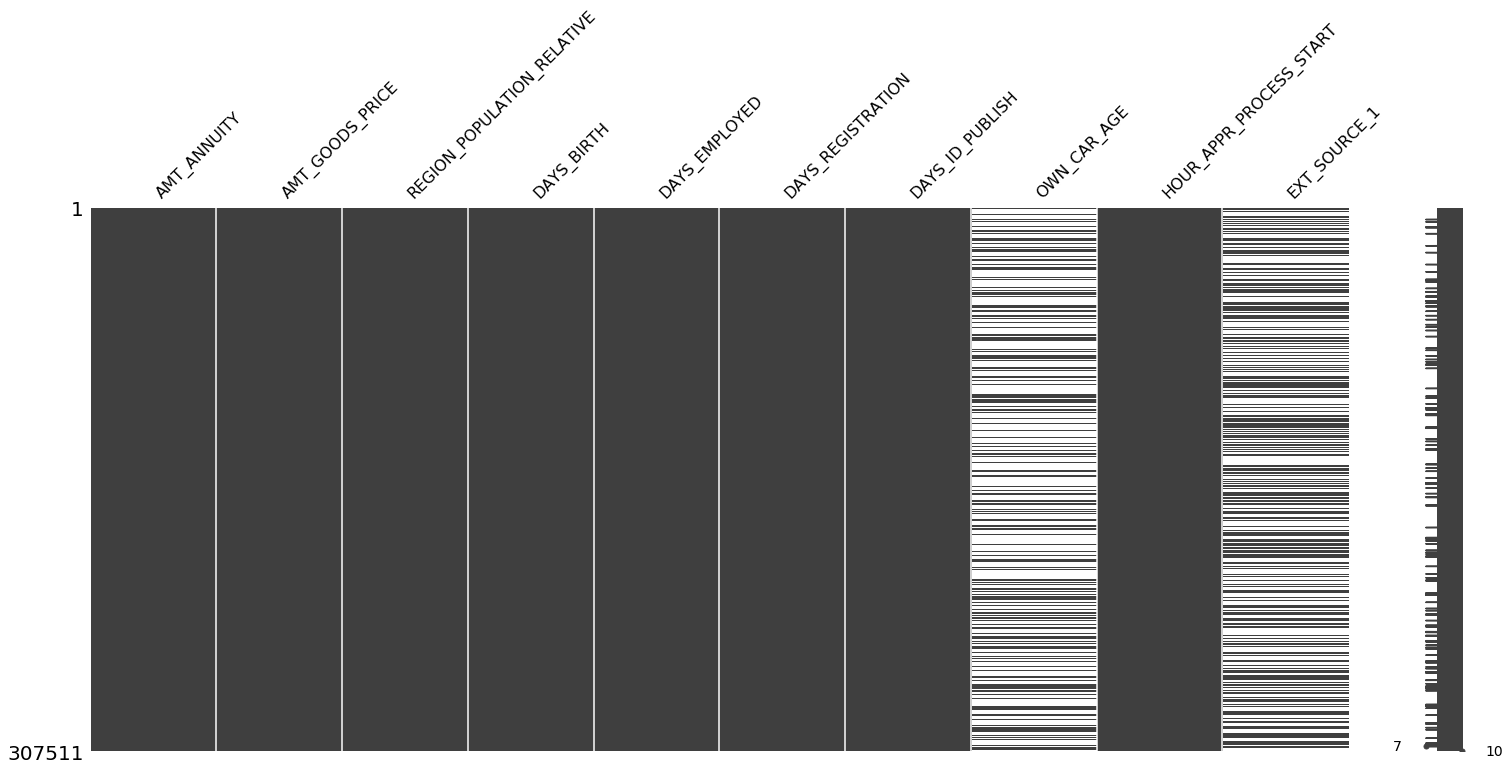

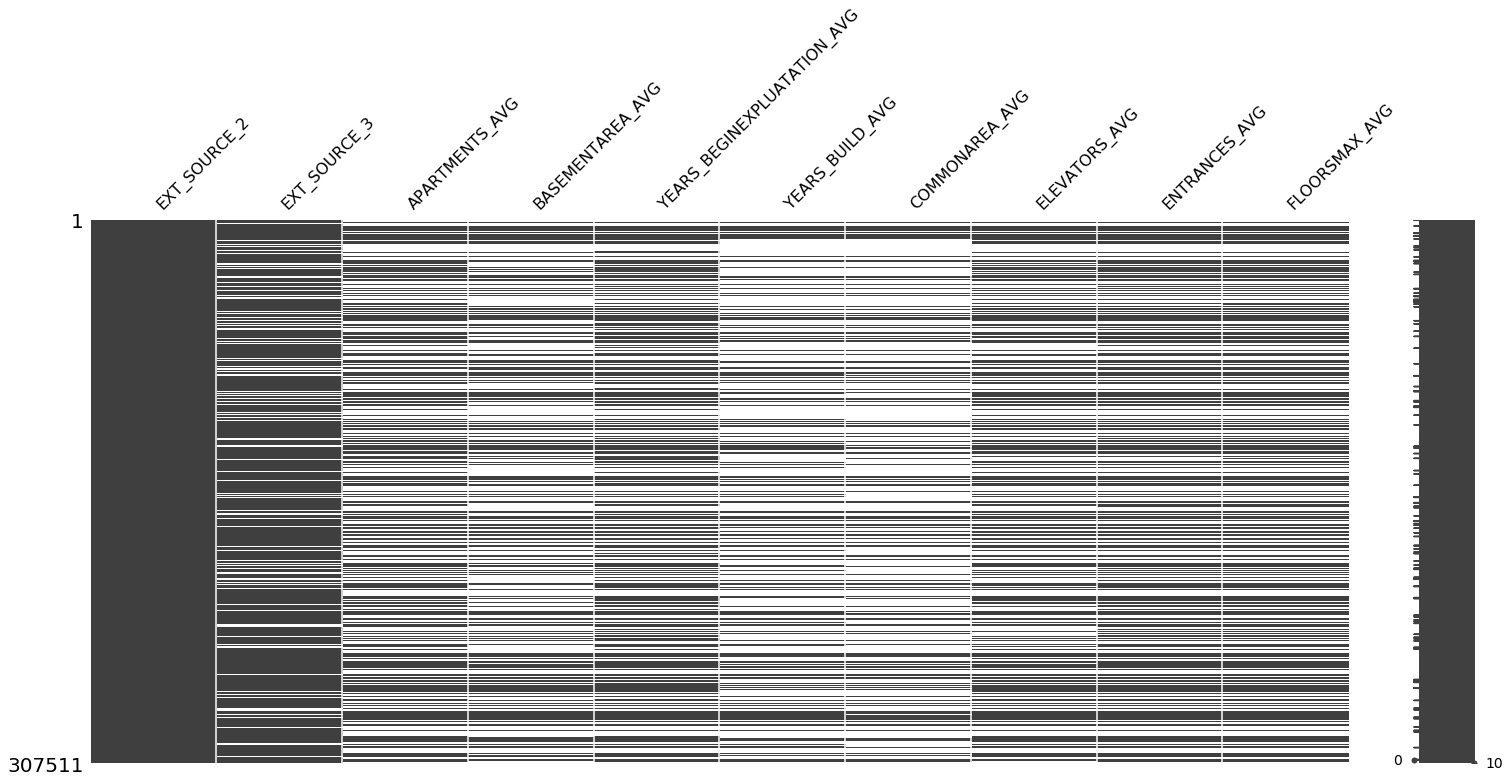

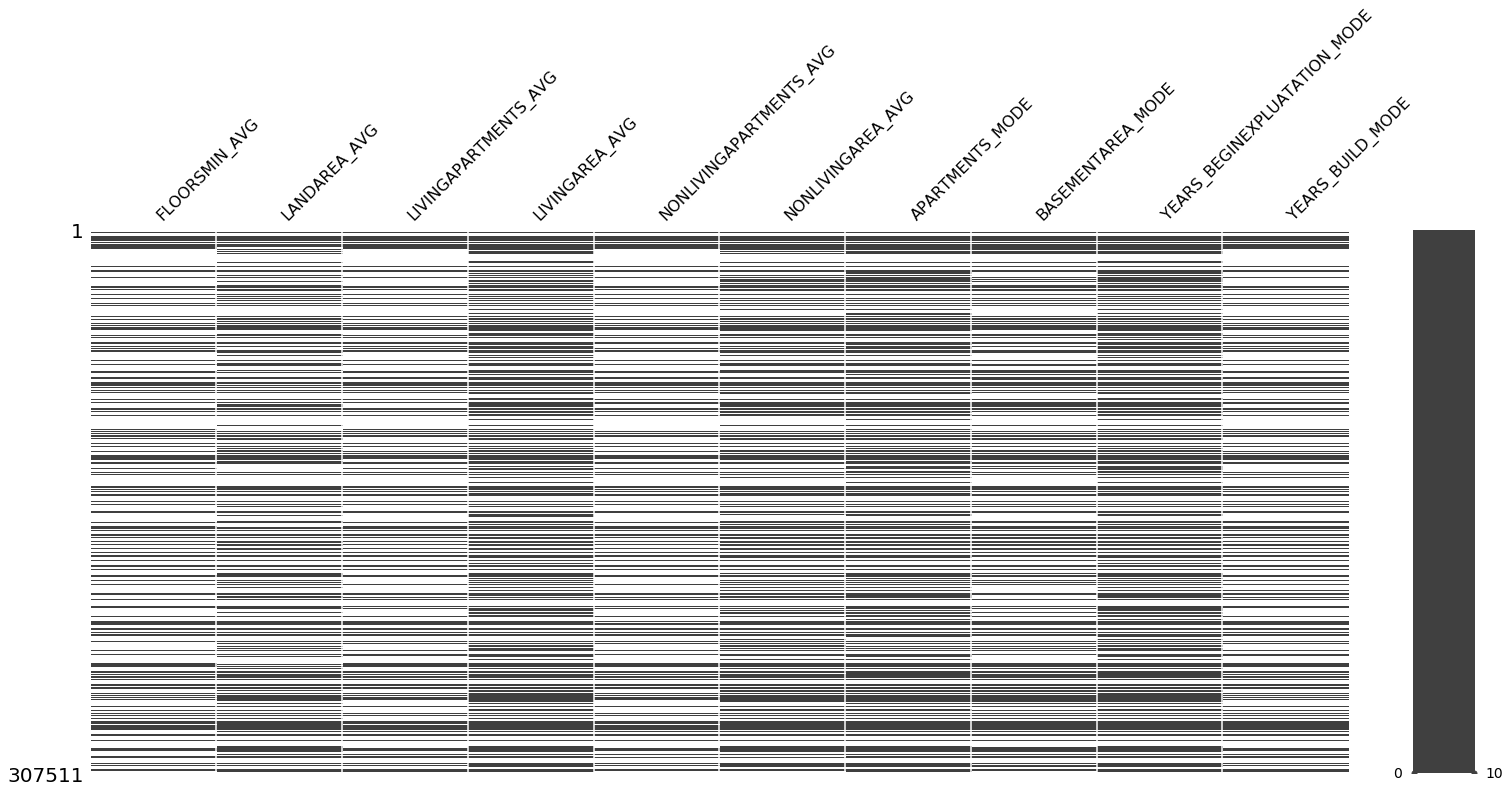

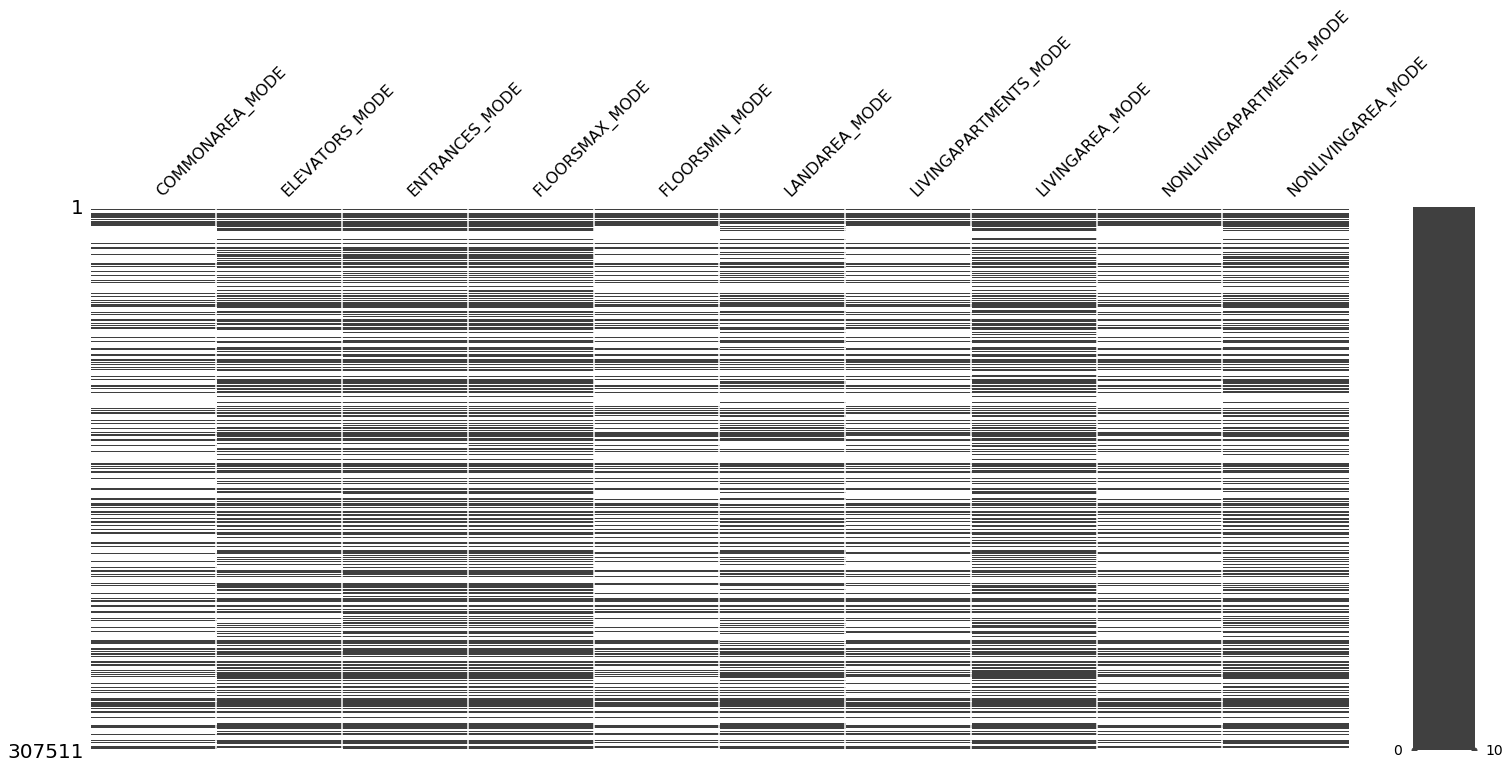

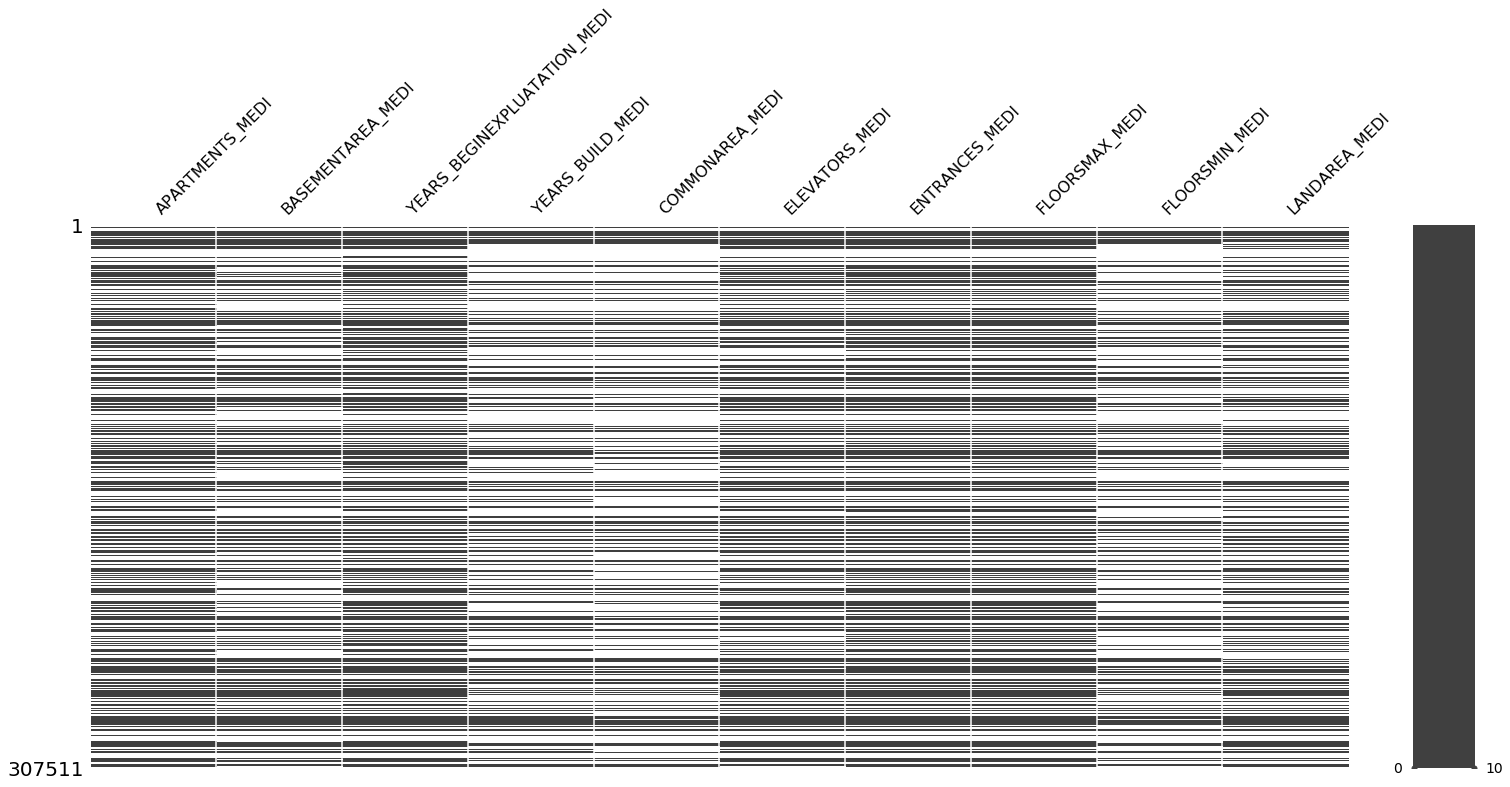

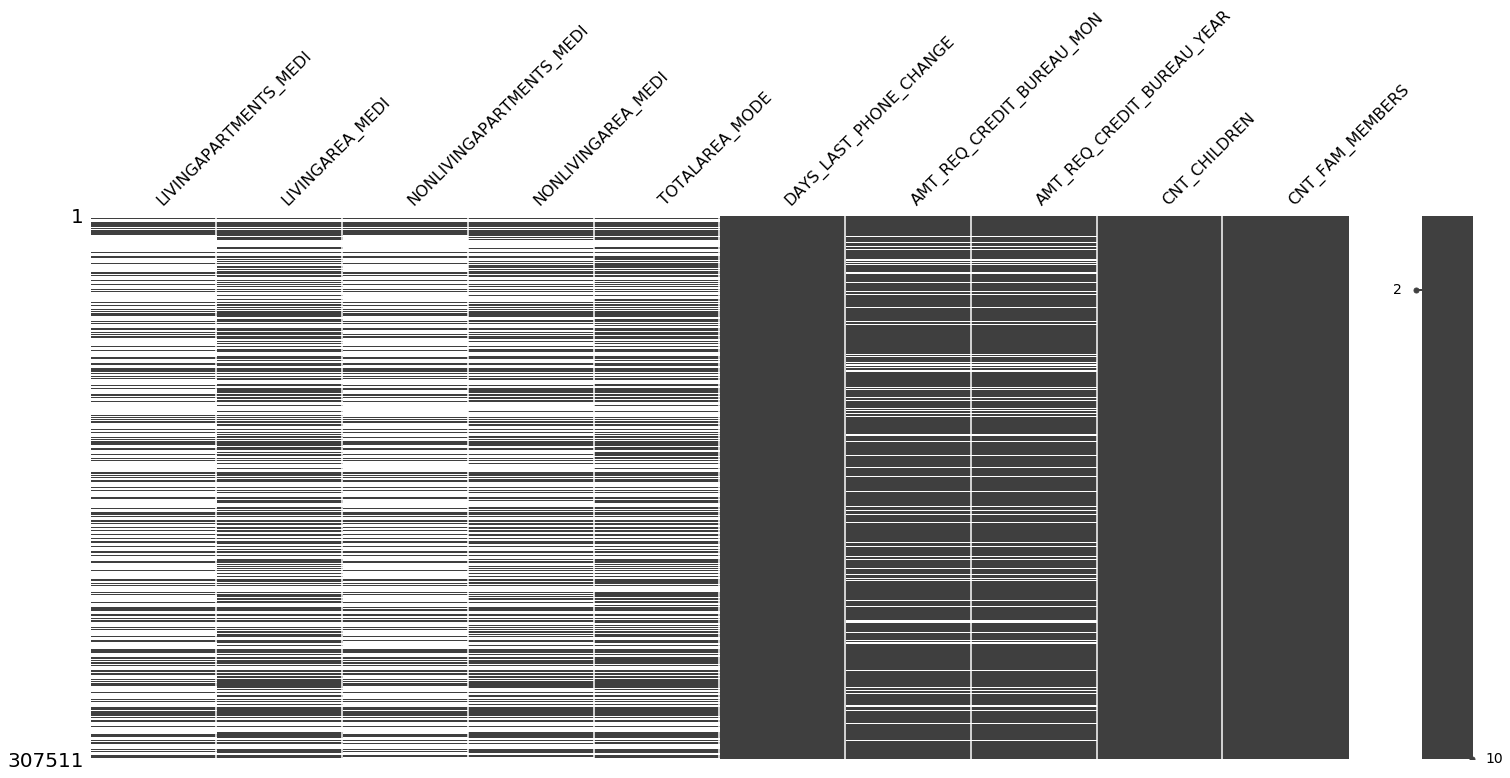

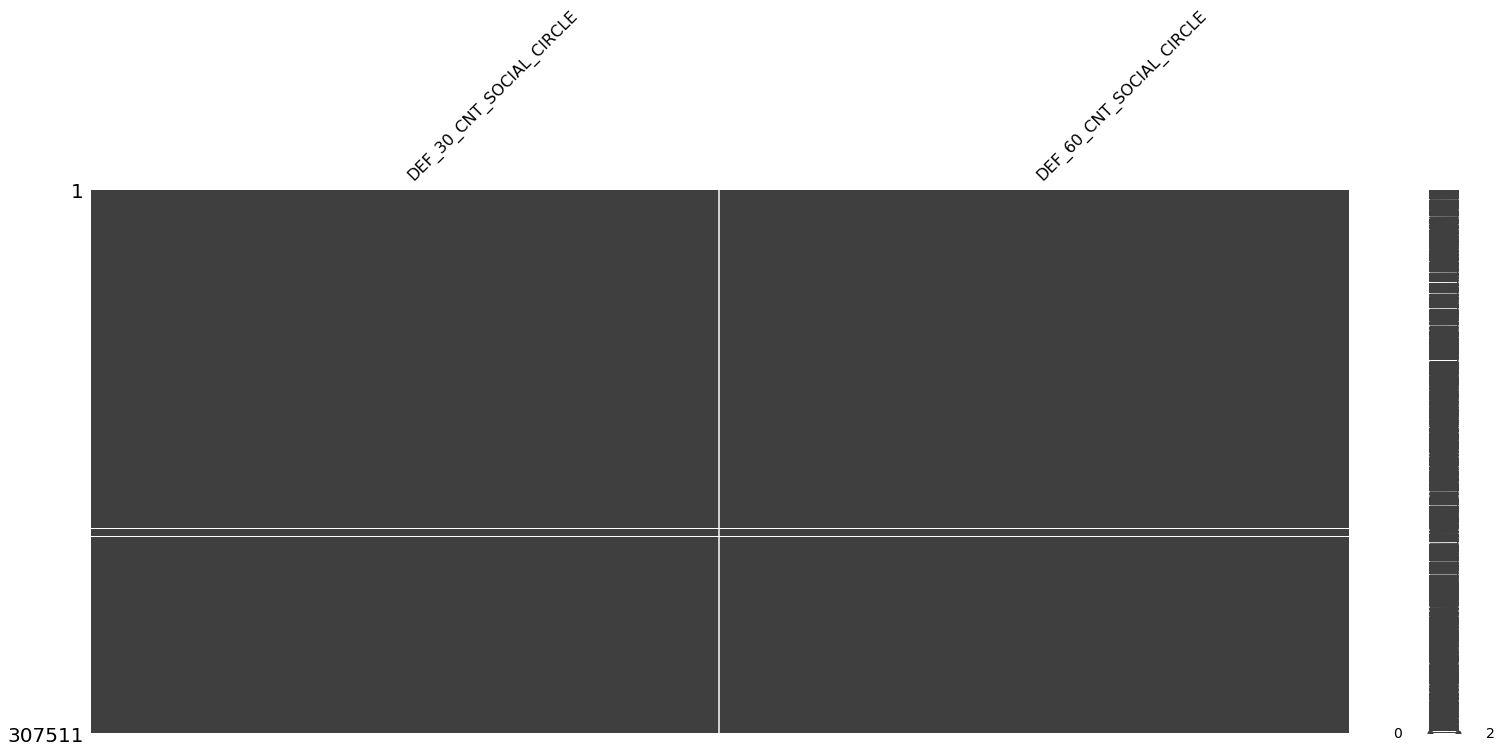

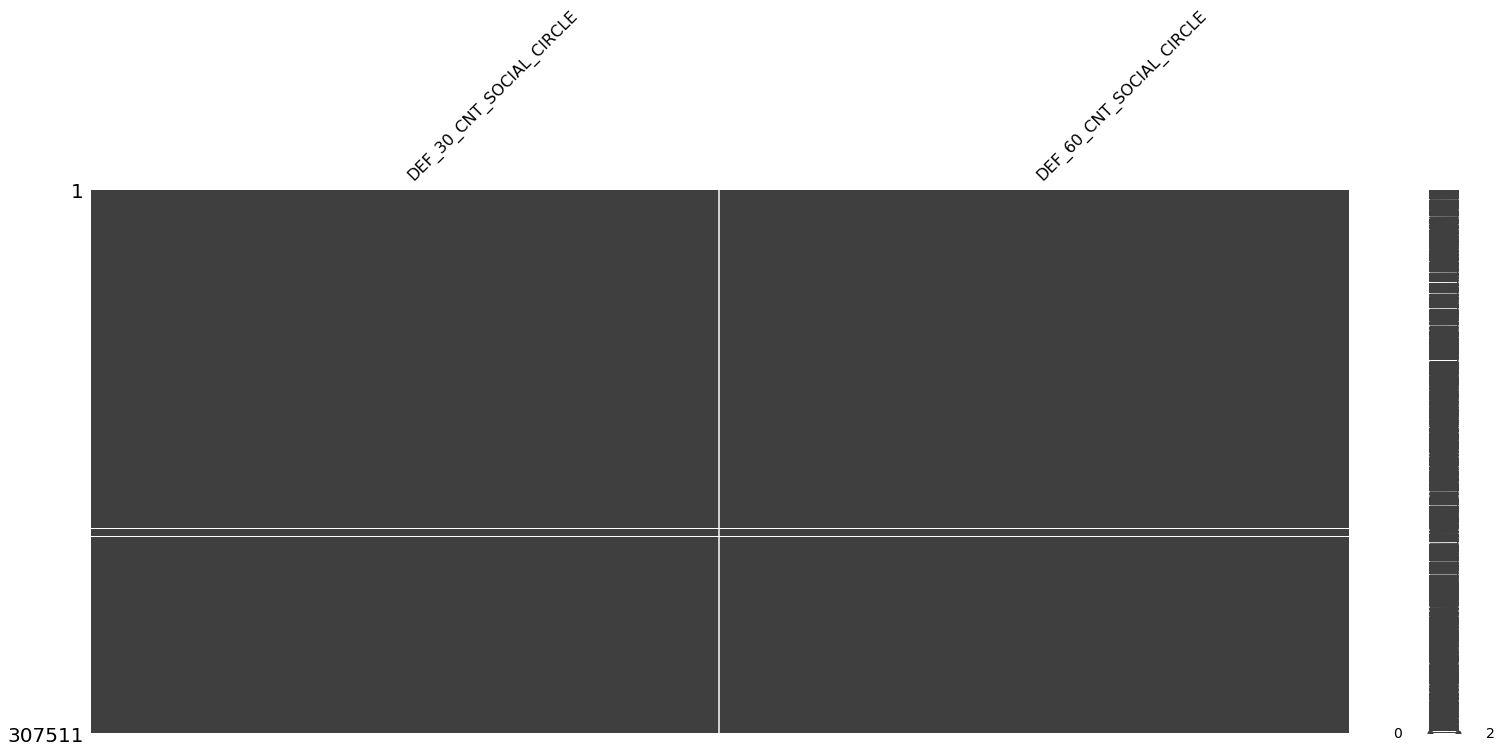

In [28]:
for i in range(1, len(num_col), 10):
    if i + 10 >= len(num_col) - 1:
        msno.matrix(app_df.loc[:,num_col[i:len(num_col)]])
    msno.matrix(app_df.loc[:, num_col[i:(i + 10)]])

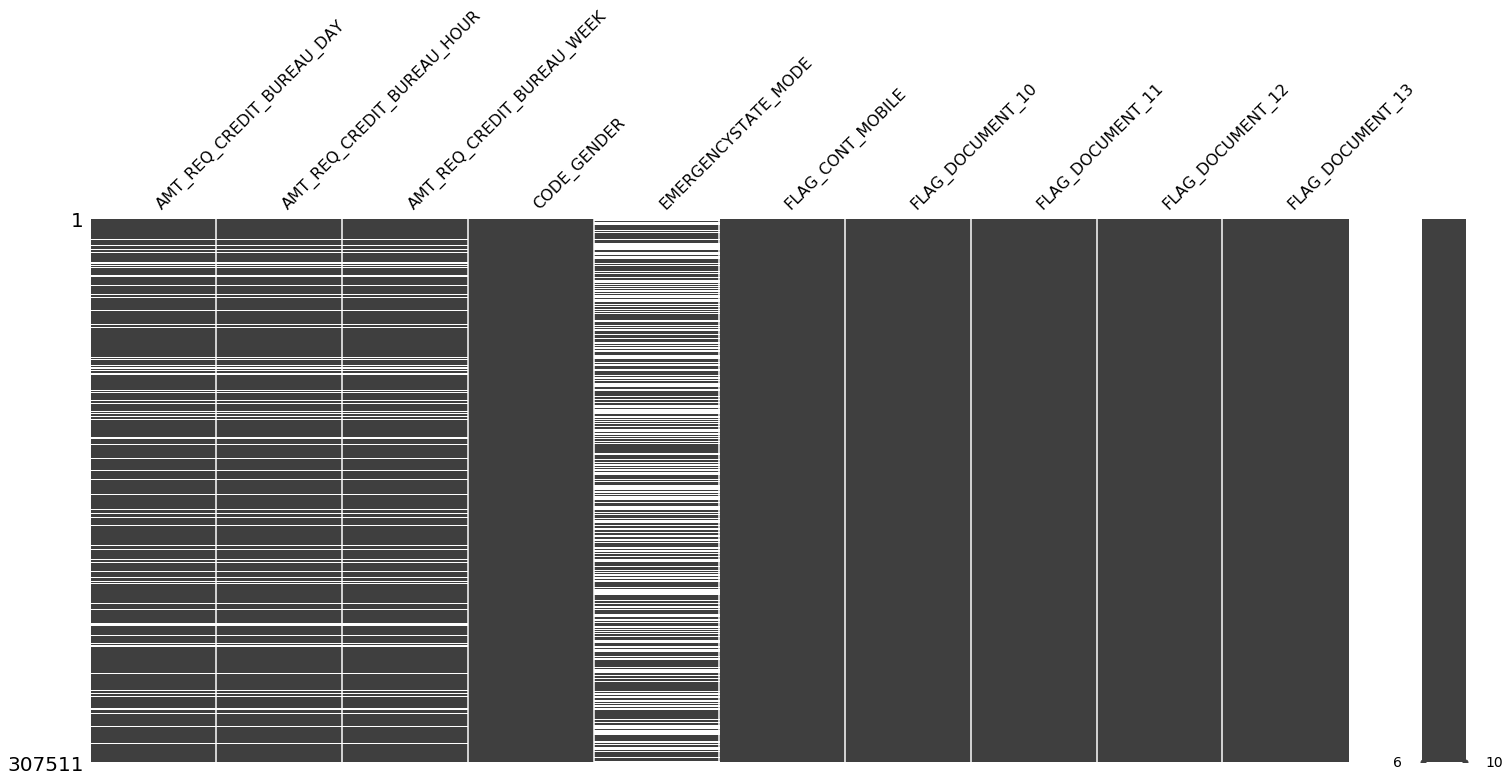

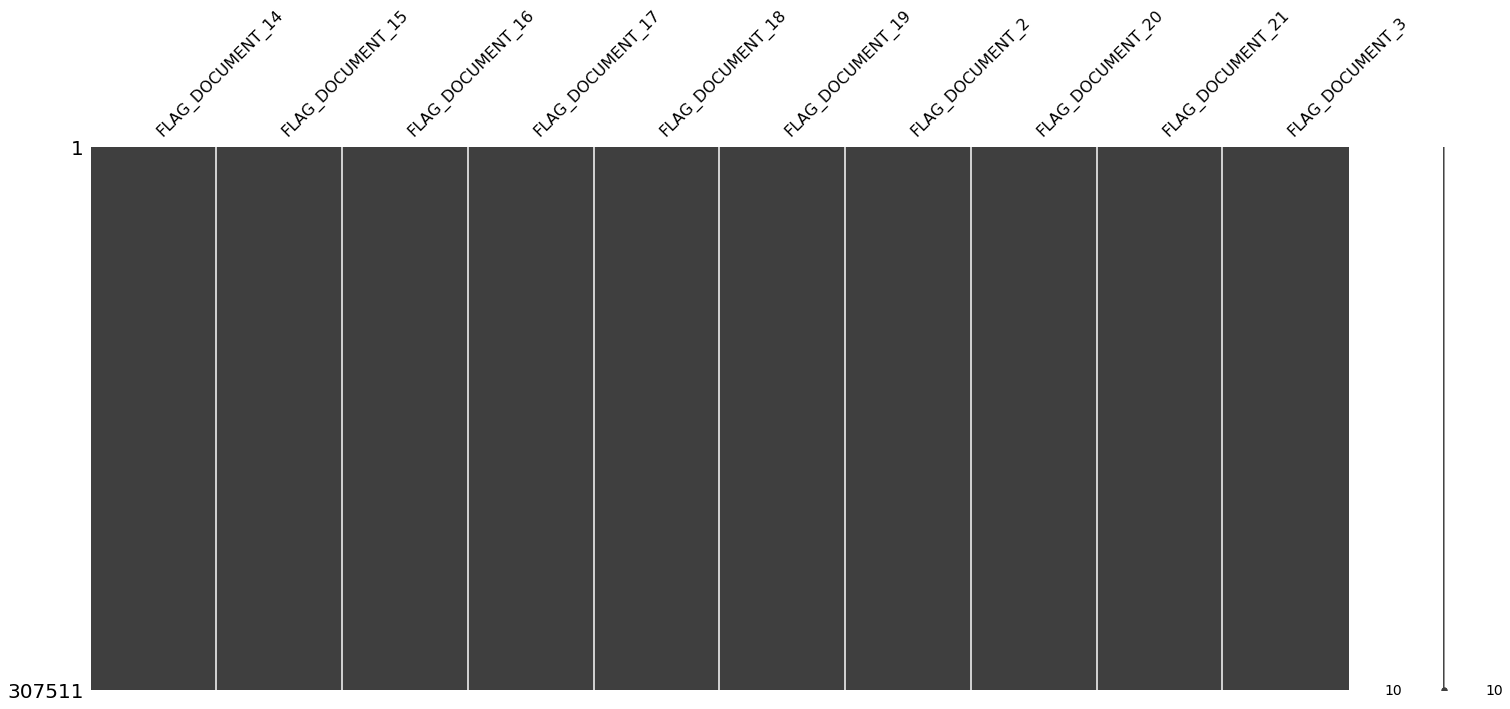

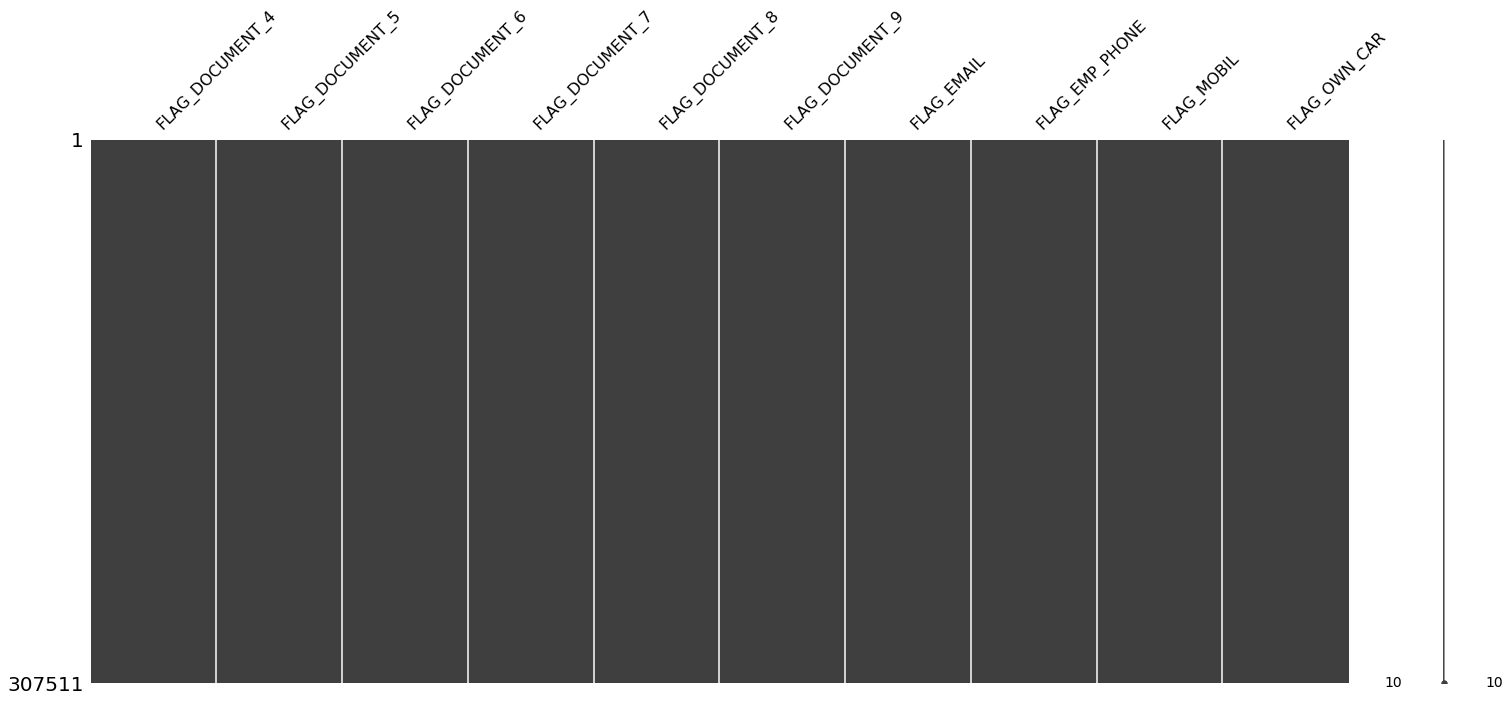

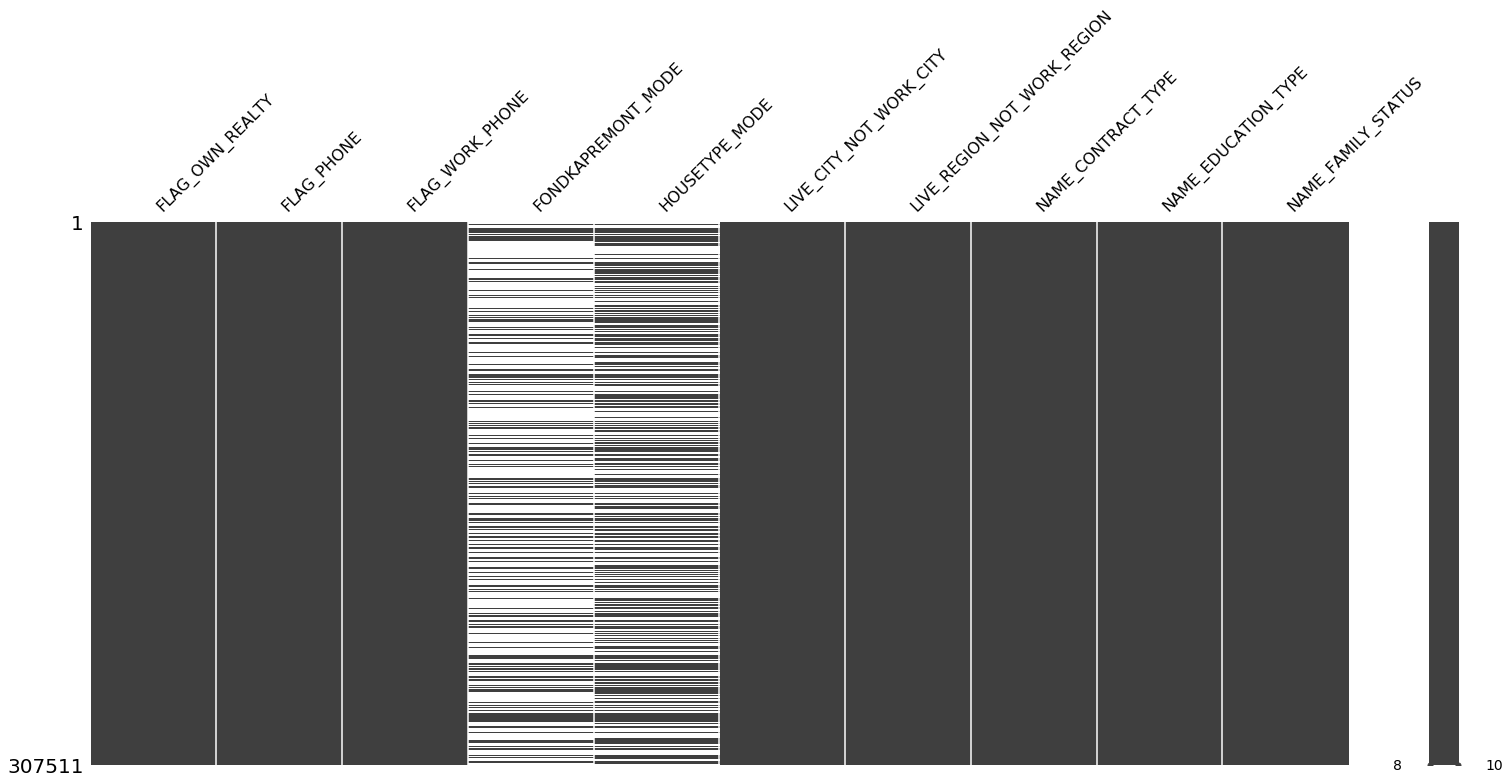

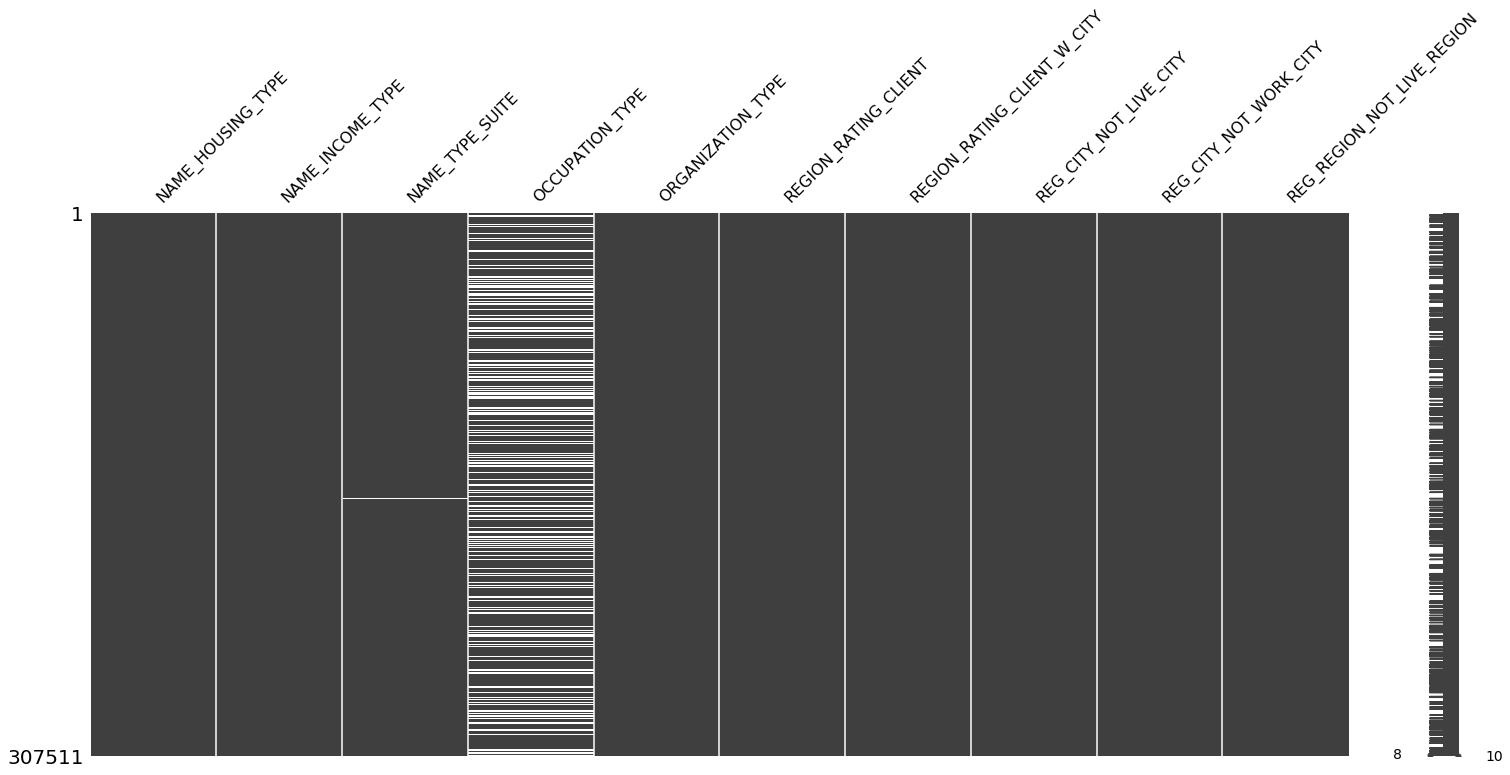

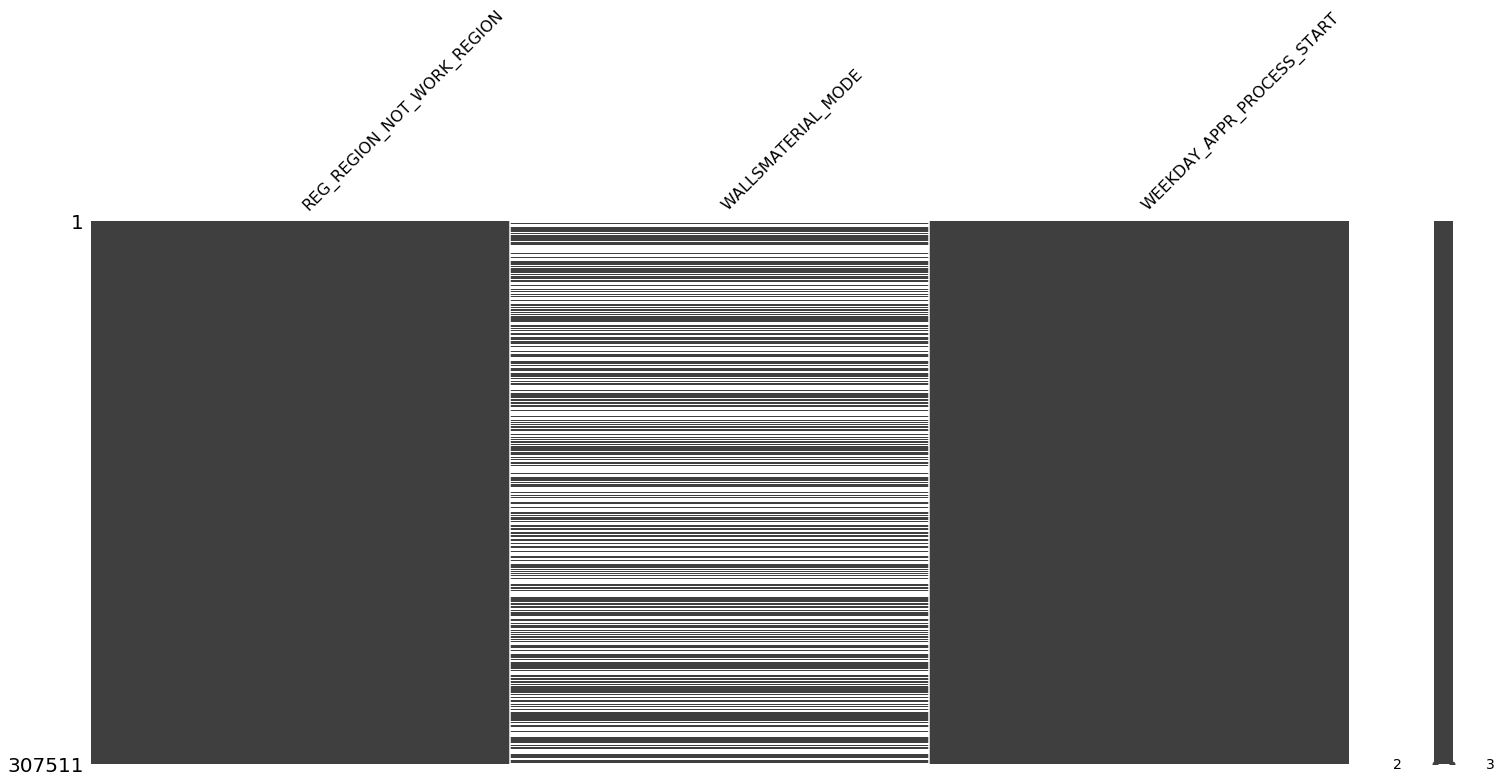

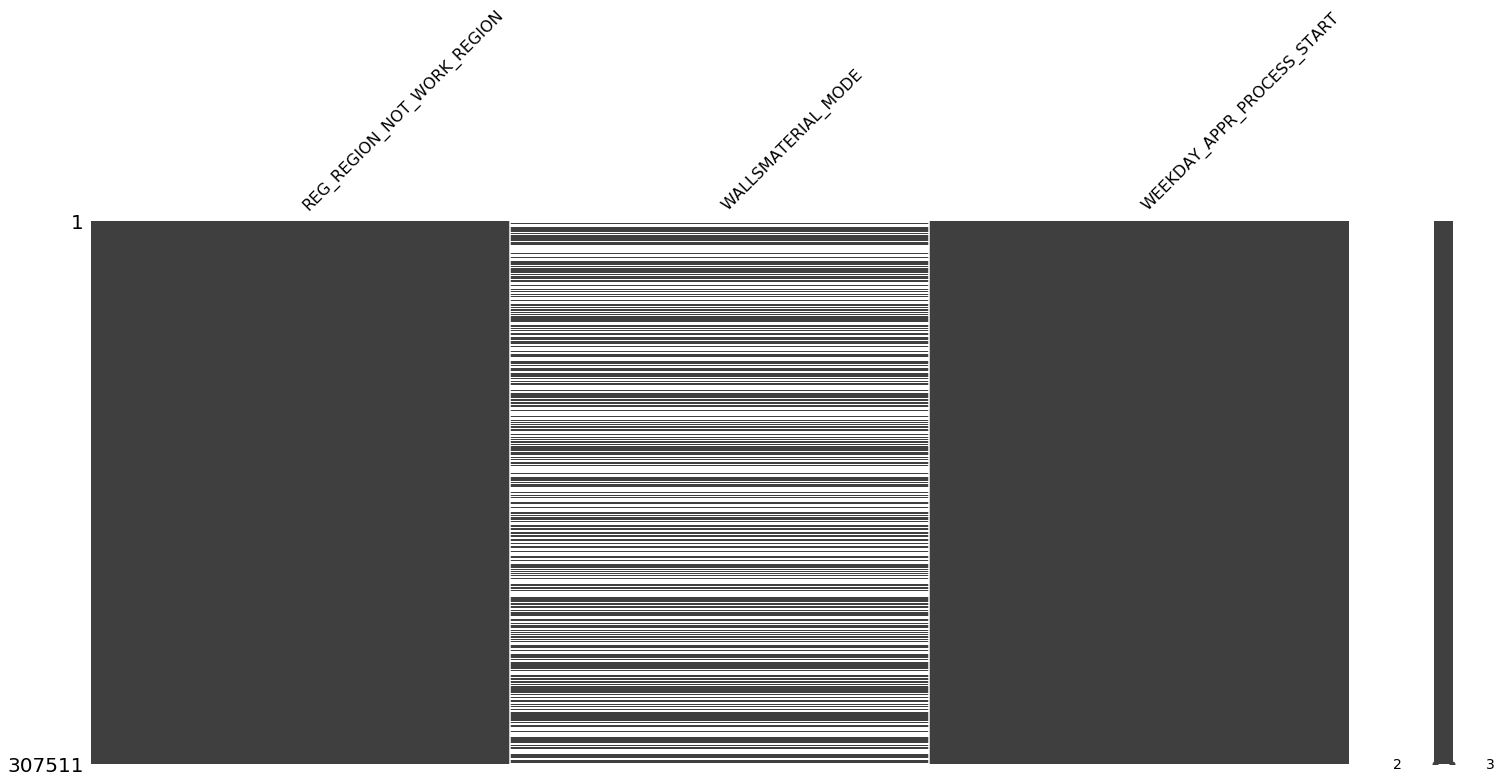

In [29]:
for i in range(0, len(cat_col), 10):
    if i + 10 >= len(cat_col) - 1:
        msno.matrix(app_df.loc[:,cat_col[i:len(cat_col)]])
    msno.matrix(app_df.loc[:, cat_col[i:(i + 10)]])

In [30]:
a = app_df.loc[:,num_col].corr().loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]

In [31]:
app_df.loc[app_df['EXT_SOURCE_1'].isna(),'FLAG_DOCUMENT_12'].value_counts()

0    173378
Name: FLAG_DOCUMENT_12, dtype: int64

In [32]:
app_df.loc[:,'FLAG_DOCUMENT_10'].value_counts()

0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64

In [33]:
for cat_c in cat_col:
    print(app_df.loc[:,cat_c].value_counts())

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64
1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64
0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64
0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64
0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64
0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64
0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64
0    307139
1       372
Name: 

In [34]:
type_of_house = app_df.loc[~app_df['HOUSETYPE_MODE'].isnull(),'HOUSETYPE_MODE'].unique()
r = re.compile(".*_AVG")
house_metrics_col = list(filter(r.match, num_col))

In [35]:
## Check for a particular type of if all rows is na or not
for hm in house_metrics_col:
    print(hm + '--')
    for ho_ty in type_of_house:
        print(ho_ty)
        print(len(app_df.loc[(app_df['HOUSETYPE_MODE'] == ho_ty) & (app_df[hm].isnull())]) * 100 / \
        len(app_df.loc[(app_df['HOUSETYPE_MODE'] == ho_ty)]))

APARTMENTS_AVG--
block of flats
2.457758317109958
terraced house
3.3003300330033003
specific housing
3.202134756504336
BASEMENTAREA_AVG--
block of flats
17.361115725267936
terraced house
40.0990099009901
specific housing
20.28018679119413
YEARS_BEGINEXPLUATATION_AVG--
block of flats
0.5521484621569005
terraced house
2.6402640264026402
specific housing
1.067378252168112
YEARS_BUILD_AVG--
block of flats
32.6265921609536
terraced house
50.742574257425744
specific housing
50.833889259506336
COMMONAREA_AVG--
block of flats
39.36333495013388
terraced house
55.03300330033003
specific housing
57.505003335557035
ELEVATORS_AVG--
block of flats
7.182581078118044
terraced house
15.676567656765677
specific housing
8.939292861907939
ENTRANCES_AVG--
block of flats
1.9959735021893252
terraced house
21.03960396039604
specific housing
1.467645096731154
FLOORSMAX_AVG--
block of flats
1.1089479943921383
terraced house
3.7953795379537953
specific housing
0.800533689126084
FLOORSMIN_AVG--
block of flats
35.

# First model Prototype
### Only with those columns which have no missing value

In [36]:
col_with_no_missing_value = np.array(app_df.isnull().sum().loc[app_df.isnull().sum() == 0].index)

In [37]:
num_co = np.intersect1d(col_with_no_missing_value, np.array(num_col))
cat_co = np.intersect1d(col_with_no_missing_value, np.array(cat_col))
y_co = np.array(['TARGET'])

In [38]:
sel_df = app_df.loc[:,np.concatenate((num_co, cat_co, y_co))]

In [39]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(sel_df, sel_df['TARGET']):
    train_set = sel_df.loc[train_index]
    test_set = sel_df.loc[test_index]

In [40]:
from sklearn.preprocessing import StandardScaler

In [105]:
num_pipeline = Pipeline([('standard_scaler', StandardScaler())])
cat_pipeline = Pipeline([('one_hot_encoding', OneHotEncoder(handle_unknown = 'ignore'))])
full_pipeline = ColumnTransformer([('num', num_pipeline, num_co),
                                   ('cat', cat_pipeline, cat_co)])

In [106]:
np.random.seed(18)
target_0_eq = train_set.loc[train_set['TARGET'] == 0].reset_index(drop = True).iloc[np.random.randint(0, 226149, 19860),]
target_eq = target_0_eq.append(train_set.loc[train_set['TARGET'] == 1, ]).sample(frac = 1).reset_index(drop = True)

In [118]:
train_set_tr = full_pipeline.fit_transform(train_set)
#train_set_tr = full_pipeline.fit_transform(target_eq)
train_set_tr.shape

(246008, 177)

In [120]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
#rnd_clf.fit(train_set_tr, target_eq['TARGET'])
rnd_clf.fit(train_set_tr, train_set['TARGET'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [121]:
from sklearn.metrics import roc_auc_score

In [123]:
roc_auc_score(test_set.loc[:,'TARGET'] , rnd_clf.predict_proba(full_pipeline.transform(test_set))[:, 1])

0.6542732695674348

In [124]:
from sklearn.linear_model import SGDClassifier

In [125]:
sgd_clf = SGDClassifier()
sgd_clf.fit(train_set_tr, train_set['TARGET'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [129]:
roc_auc_score(test_set.loc[:,'TARGET'] , sgd_clf.decision_function(full_pipeline.transform(test_set)))

0.5857633916028351

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
confusion_matrix(test_set['TARGET'], rnd_clf.predict(full_pipeline.transform(test_set)))

array([[34065, 22473],
       [ 1844,  3121]], dtype=int64)

## All columns

In [148]:
from sklearn.impute import SimpleImputer

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin

In [226]:
class CategoricalMissing(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        for col in X.columns:
            X.loc[X[col].isnull(),col] = 'NaN' + col
        return X.astype('str')

In [227]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(app_df, app_df['TARGET']):
    train_set = app_df.loc[train_index]
    test_set = app_df.loc[test_index]

In [228]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),('standard_scaler', StandardScaler())])
cat_pipeline = Pipeline([('cat_missing', CategoricalMissing()),('one_hot_encoding', OneHotEncoder(handle_unknown = 'ignore'))])
full_pipeline = ColumnTransformer([('num', num_pipeline, np.array(num_col)),
                                   ('cat', cat_pipeline, np.array(cat_col))])

In [229]:
train_set_tr = full_pipeline.fit_transform(train_set)
#train_set_tr = full_pipeline.fit_transform(target_eq)
train_set_tr.shape

(246008, 305)

In [230]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
#rnd_clf.fit(train_set_tr, target_eq['TARGET'])
rnd_clf.fit(train_set_tr, train_set['TARGET'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [231]:
roc_auc_score(test_set.loc[:,'TARGET'] , rnd_clf.predict_proba(full_pipeline.transform(test_set))[:, 1])

0.726094544082446

In [ ]:
## Missing Value notes
## FLAG_OWN_CAR and OWN CAR AGE
  ## if own car age is nan most of the flag own car will be No
  ## if flag own car is n and own car age is nan then can impute it as 0
  ## if flag own car is y and own car age is nan then can impute it as average of training data set

In [ ]:
## Have to remove flag documents 12 not adding  much value only 2 1s
## Remove because of less count of others - FLAG_CONT_MOBILE, FLAG_DOCUMENT_11, FLAG_DOCUMENT_19, FLAG_DOCUMENT_3, 
## FLAG_EMP_PHONE
## may be - FLAG_DOCUMENT_16(82), FLAG_DOCUMENT_6(59), FLAG_DOCUMENT_18(183) - let's start with including then 
## then won't include them

# Notes

In [ ]:
## Problem Approach
## 1. Start with taking equal number defaulted and non-defaulted loans
## 2. Then find a way to handle different propotion of target variables problem


In [ ]:
## 1. cnt_children are numerical

# Rough Work

In [235]:
prev_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
